In [3]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

** Question 1 : We conducted  $ m=500 $ groups of experiments where each group draws $ n=10 $ samples. Vary $ m $ and $ n $. Observe and analyze the experimental results. **

In [4]:
fair_probs = torch.ones([6]) / 6

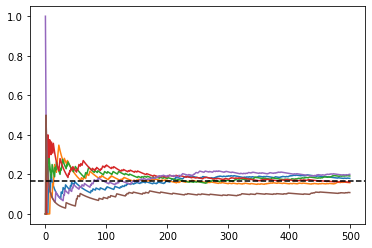

In [6]:
counts = multinomial.Multinomial(1, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy())
plt.axhline(y=1/6, color='black', linestyle='dashed')
plt.show()

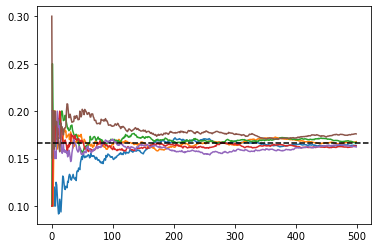

In [7]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy())
plt.axhline(y=1/6, color='black', linestyle='dashed')
plt.show()

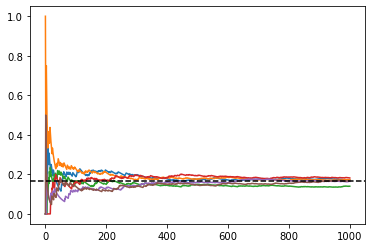

In [8]:
counts = multinomial.Multinomial(1, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy())
plt.axhline(y=1/6, color='black', linestyle='dashed')
plt.show()

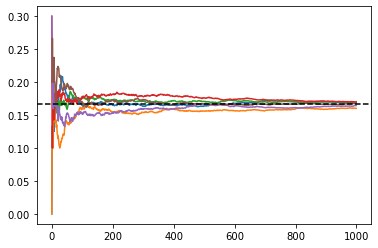

In [10]:
counts = multinomial.Multinomial(10, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy())
plt.axhline(y=1/6, color='black', linestyle='dashed')
plt.show()

well the final precision depend on $ n * m $, when you change $ n $ you change the number of experiments your are doing for each $ m $ points .

** Question 2 : Given two events with probability $ P(A) $ and $ P(B) $, compute upper and lower bounds on $ P(A \cup B) $ and $ P(A \cap B) $. (Hint: display the situation using a Venn Diagram.) **

In [11]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

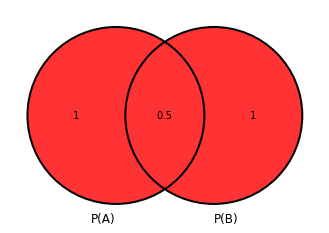

In [26]:
venn2(subsets = (1, 1, 0.5), set_labels = ('P(A)', 'P(B)'), set_colors=('r', 'r'), alpha = 0.8);
venn2_circles(subsets = (1, 1, 0.5));

$ P(A \cap B) $ is all the surface between $ P(A) $ and $ P(B) $ (0.5) and $ P(A \cup B) $ is all the surface colored in red.

** Question 3 : Assume that we have a sequence of random variables, say $ A $, $ B $, and $ C $, where $ B $ only depends on $ A $, and $ C $ only depends on $ B $, can you simplify the joint probability $ P(A,B,C) $? (Hint: this is a Markov Chain.) **

$ P(A, B, C) = P(C | A, B) * P(A, B) = P(C | A, B) * [P(B | A) * P(A)] $

because $ C $ is only dependent on $ B $: 

$ P(C|A,B) = P(C|B) $

so :

$ P(A, B, C) = P(C | B) * [P(B | A) * P(A)] $